In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
X, Y = load_breast_cancer(return_X_y=True)

In [4]:
X.shape

(569, 30)

In [5]:
Y.shape

(569,)

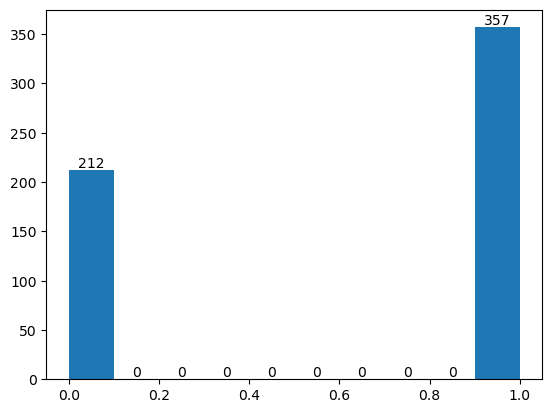

In [6]:
edge, lines, bins = plt.hist(Y)
plt.bar_label(bins)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123, stratify=Y)

In [15]:
X_train.shape

(426, 30)

In [ ]:
# i za SVM treba da izvrsim standardizaciju podataka 
# normalnom(0,1) raspodelom
# da ocekivanje bude 0, a disperzija 1

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(X_train)

StandardScaler()

In [19]:
X_train = scaler.transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [21]:
from sklearn.svm import SVC

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
params = [
    {
        'kernel': ['linear'],
        'C': [0.01, 0.1, 1, 10]
    },
    {
        'kernel': ['rbf'],
        'C': [0.01, 0.1, 1, 10],
        'gamma': [0.01, 0.1, 1, 10]
    }
]

In [24]:
estimator = GridSearchCV(SVC(), param_grid=params, cv=5, verbose=5)

In [25]:
estimator.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.930 total time=   0.0s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.976 total time=   0.0s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.953 total time=   0.0s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.953 total time=   0.0s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.988 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.942 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.988 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.976 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.976 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.953 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10],
                          'kernel': ['rbf']}],
             verbose=5)

In [26]:
estimator.best_estimator_

SVC(C=10, gamma=0.01)

In [27]:
estimator.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [28]:
estimator.best_score_

0.9789603283173735

In [29]:
y_pred = estimator.best_estimator_.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [31]:
confusion_matrix(y_test, y_pred)

array([[50,  3],
       [ 0, 90]])

In [32]:
accuracy_score(y_test, y_pred)

0.9790209790209791

In [33]:
f1_score(y_test, y_pred)

0.9836065573770492

In [34]:
# -------------------------------------------------------------------

In [35]:
num_instances = 1000
X = np.random.uniform(low=-1, high=1, size=(num_instances, 2))

In [36]:
def f(x, y):
    return x**2 + y**2 <= 0.5

In [37]:
y = f(X[:,0], X[:,1])

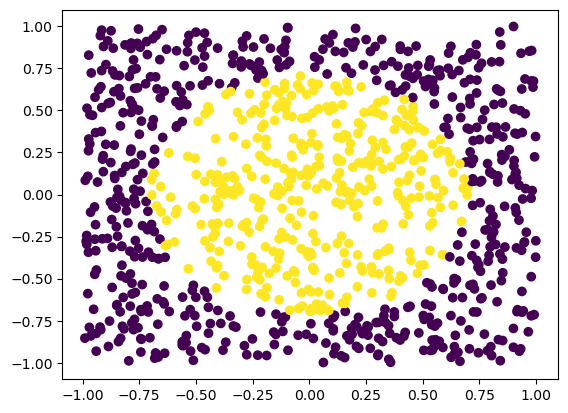

In [39]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [40]:
model = SVC(kernel='linear')

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)

In [42]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [43]:
y_train_pred = model.predict(X_train)

In [44]:
accuracy_score(y_train, y_train_pred)

0.608

In [45]:
y_test_pred = model.predict(X_test)

In [46]:
accuracy_score(y_test, y_test_pred)

0.608

In [47]:
model = SVC(kernel='rbf')

In [48]:
model.fit(X_train, y_train)

SVC()

In [49]:
y_train_pred = model.predict(X_train)

In [50]:
y_test_pred = model.predict(X_test)

In [51]:
accuracy_score(y_train, y_train_pred)

0.9786666666666667

In [52]:
accuracy_score(y_test, y_test_pred)

0.984

In [53]:
print(f'Broj potpornih vektora za svaku od klasa: {model.n_support_}')

Broj potpornih vektora za svaku od klasa: [78 74]


In [54]:
print(f'Indeksi instanci koje su potporni vektori: {model.support_}')

Indeksi instanci koje su potporni vektori: [  9  13  19  20  27  29  35  51  68  73  96 101 106 120 123 131 132 153
 154 158 178 181 200 209 214 218 222 226 238 240 274 292 300 306 312 318
 319 324 331 368 379 385 389 394 425 434 442 465 467 468 483 491 499 514
 519 527 528 539 542 555 567 568 576 578 596 599 613 614 633 640 654 655
 656 661 692 703 707 725   7  17  22  24  67  74  78  81 112 152 161 167
 185 194 213 227 244 249 250 253 254 256 259 268 281 284 287 297 304 311
 314 315 333 352 357 378 386 387 396 397 407 416 435 436 439 469 481 486
 489 493 503 533 553 554 564 565 601 608 615 622 632 652 669 681 685 689
 694 700 701 731 734 737 739 744]


In [55]:
print(f'Sami potporni vektori: {model.support_vectors_}')

Sami potporni vektori: [[ 0.10603054 -0.81003913]
 [ 0.71645312  0.18512497]
 [-0.58635597  0.40070799]
 [ 0.71747381  0.07806433]
 [ 0.71770203 -0.3633088 ]
 [-0.56024772  0.43397721]
 [ 0.10846922 -0.71828571]
 [-0.65883491 -0.26470595]
 [ 0.53347163 -0.53152064]
 [ 0.29551828 -0.7607112 ]
 [-0.68187682  0.19342732]
 [ 0.72135931  0.093529  ]
 [ 0.32919535 -0.71956967]
 [-0.22025759  0.78758183]
 [-0.34914619 -0.72174994]
 [-0.10518525 -0.72730845]
 [-0.69576007 -0.17762919]
 [-0.64635967  0.339496  ]
 [-0.13162338  0.75579101]
 [ 0.35446161  0.64700343]
 [ 0.44480683 -0.66398726]
 [-0.08680028  0.79167018]
 [ 0.7099679   0.25342065]
 [ 0.62030228 -0.37045673]
 [ 0.72111574 -0.0643391 ]
 [-0.46207448 -0.57494367]
 [ 0.61714872  0.35897465]
 [ 0.42563132  0.64435396]
 [ 0.10639525 -0.73036801]
 [-0.57113834  0.52938069]
 [-0.71352066 -0.20906898]
 [ 0.72771686  0.07973632]
 [-0.68372121 -0.22028863]
 [-0.22663626  0.69222075]
 [-0.14102005  0.79966085]
 [ 0.18671542 -0.79443166]
 [-0.

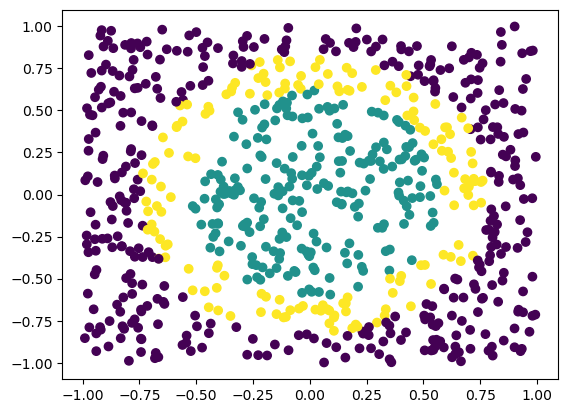

In [56]:
color = y_train.astype(int)
color[model.support_] = 2
plt.scatter(X_train[:,0], X_train[:,1], c=color)
plt.show()